### Importamos librerías

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

### Importamos dataframe

In [3]:
df_aerolinea = pd.read_csv('../files/aerolinea_limpio.csv', index_col=0)

In [4]:
df_aerolinea.sample()

,Loyalty_Number,Province,City,Postal_Code,Gender,Education,Salary_$,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Date,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Date
343440,996301,Ontario,Kingston,M9K_2P4,Male,College,79359,Married,Star,6265.34,Standard,2012-12,3,3,6,750,75,0,0,2017-01


In [5]:
df_aerolinea.columns

Index(['Loyalty_Number', 'Province', 'City', 'Postal_Code', 'Gender',
       'Education', 'Salary_$', 'Marital_Status', 'Loyalty_Card', 'CLV',
       'Enrollment_Type', 'Enrollment_Date', 'Flights_Booked',
       'Flights_with_Companions', 'Total_Flights', 'Distance',
       'Points_Accumulated', 'Points_Redeemed', 'Dollar_Cost_Points_Redeemed',
       'Date'],
      dtype='object')

#### Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

### 1.  ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

Primero tengo que acceder a los meses de la columna date

In [6]:
# Aseguramos que la columna 'Date' esté en formato datetime
df_aerolinea['Date'] = pd.to_datetime(df_aerolinea['Date'], format='%Y-%m')

# Extraemos el mes
df_aerolinea['Month'] = df_aerolinea['Date'].dt.month

In [7]:
df_aerolinea['Year'] = df_aerolinea['Date'].dt.year

In [8]:
df_aerolinea.head(3)

,Loyalty_Number,Province,City,Postal_Code,Gender,Education,Salary_$,Marital_Status,Loyalty_Card,CLV,...,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Date,Month,Year
0,480934,Ontario,Toronto,M2Z_4K1,Female,Bachelor,83236,Married,Star,3839.14,...,0,0,0,0,0,0,0,2017-01-01,1,2017
1,480934,Ontario,Toronto,M2Z_4K1,Female,Bachelor,83236,Married,Star,3839.14,...,3,0,3,2823,282,0,0,2017-02-01,2,2017
2,480934,Ontario,Toronto,M2Z_4K1,Female,Bachelor,83236,Married,Star,3839.14,...,0,0,0,0,0,0,0,2017-03-01,3,2017


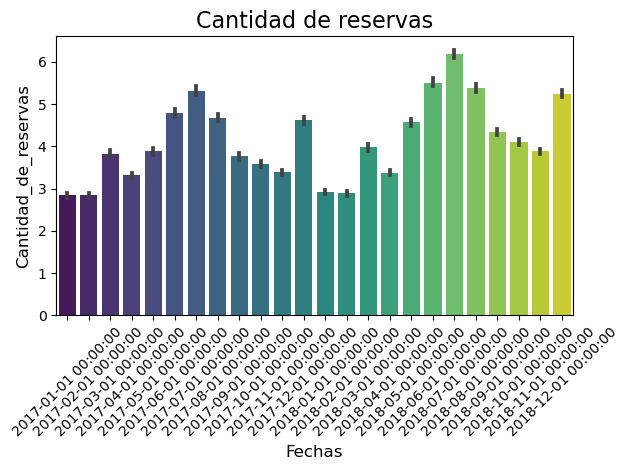

In [9]:
# Ordenar el DataFrame por la columna 'Date' de manera ascendente
df_aerolinea = df_aerolinea.sort_values(by='Date')

sns.barplot(x='Date', y='Flights_Booked', data=df_aerolinea, palette='viridis')

# Añadir título y etiquetas
plt.title('Cantidad de reservas', fontsize=16)
plt.xlabel('Fechas', fontsize=12)
plt.ylabel('Cantidad_de_reservas', fontsize=12)

# Rotar las etiquetas del eje X para una mejor visualización
plt.xticks(rotation=45)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Análisis

Con la gráfica de barras podemos ver como en los pirmeros meses de cada uno de los años la reserva de vuelos es menor con respecto a los demás meses.

El mes con más reservas en ambos años registrados es el mes de mayo.
Igualmente en el mes de diciembre se recoge un repunte de reservas con respecto a los meses de otoño.

En amos años se recoge la misma tendencia de reservas, aunque en el año 2018 los datos en general de reserva son mayores que en 2017.

### Datos estadísticos que confirman la gráfica

In [10]:
df_aerolinea.groupby('Year')['Flights_Booked'].mean().round(2)

Year
2017    3.90
2018    4.36
Name: Flights_Booked, dtype: float64

En el año 2018 hay una media de reserva mayor que en 2017

Datos generales de reserva

In [11]:
df_aerolinea['Flights_Booked'].describe().T

count    403760.000000
mean          4.134050
std           5.230064
min           0.000000
25%           0.000000
50%           1.000000
75%           8.000000
max          21.000000
Name: Flights_Booked, dtype: float64

### 2.  ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [12]:
df_aerolinea.columns

Index(['Loyalty_Number', 'Province', 'City', 'Postal_Code', 'Gender',
       'Education', 'Salary_$', 'Marital_Status', 'Loyalty_Card', 'CLV',
       'Enrollment_Type', 'Enrollment_Date', 'Flights_Booked',
       'Flights_with_Companions', 'Total_Flights', 'Distance',
       'Points_Accumulated', 'Points_Redeemed', 'Dollar_Cost_Points_Redeemed',
       'Date', 'Month', 'Year'],
      dtype='object')

In [13]:
visualizacion_num = df_aerolinea.groupby('Loyalty_Number')[['Distance','Points_Accumulated']].sum()

In [14]:
visualizacion_num

,Distance,Points_Accumulated
Loyalty_Number,,
100018,50682,5375
100102,40222,4114
100140,41252,4184
100214,33982,3425
100272,40872,4107
...,...,...
999902,57227,6055
999911,0,0
999940,23410,2415


In [15]:
# Calculamos coeficiente de correlación de Pearson
correlacion = df_aerolinea['Distance'].corr(df_aerolinea['Points_Accumulated'])
print(f'Coeficiente de correlación: {np.round(correlacion,2)}')

Coeficiente de correlación: 0.99


#### Un coeficiente de correlación de 0.99 indica una correlación muy fuerte y positiva entre las variables 

Esto significa que, a medida que la distancia aumenta, también tienden a aumentar los puntos acumulados, y lo hacen de una manera casi lineal.

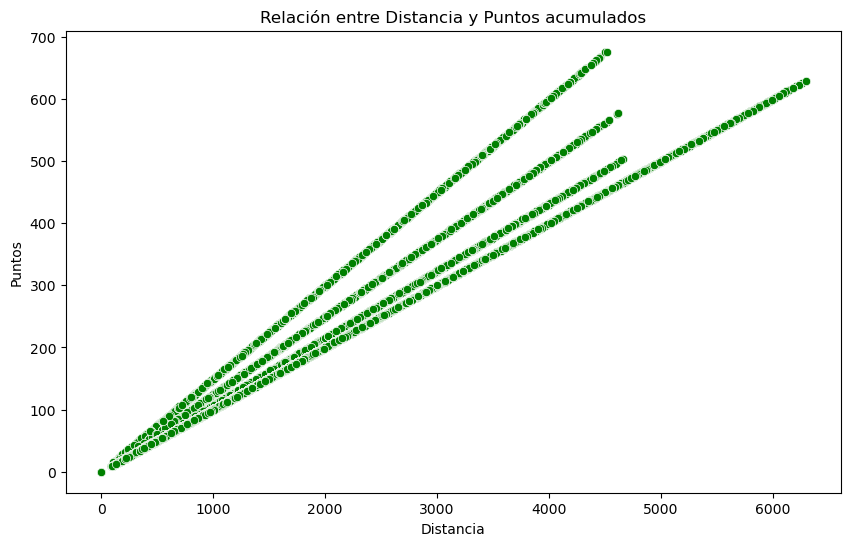

In [16]:
# Crear gráfico de dispersión
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_aerolinea, x='Distance', y='Points_Accumulated', color = 'green')
plt.title('Relación entre Distancia y Puntos acumulados')
plt.xlabel('Distancia')
plt.ylabel('Puntos')
plt.show()

### 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [17]:
df_aerolinea.groupby('Province')['Loyalty_Number'].count().sort_values(ascending=False)

Province
Ontario                 130258
British_Columbia        106442
Quebec                   79573
Alberta                  23360
Manitoba                 15900
New_Brunswick            15352
Nova_Scotia              12507
Saskatchewan              9861
Newfoundland              6244
Yukon                     2679
Prince_Edward_Island      1584
Name: Loyalty_Number, dtype: int64

### Análisis

La provincia con mayor número de clientes es Ontario y la que menos clientes registra es Prince_Edward_Island

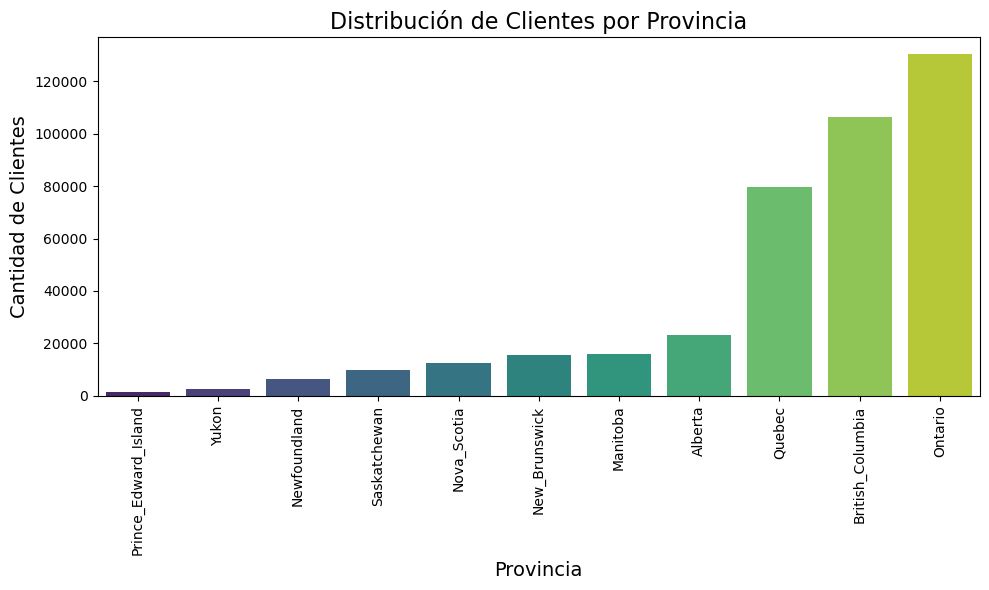

In [18]:
# Primero, ordenamos las provincias por el número de ocurrencias para poder visualizar la gráfica de manera ascendente
province_counts = df_aerolinea['Province'].value_counts().sort_values(ascending=True)

# Creamos el gráfico
plt.figure(figsize=(10, 6))  # Ajustamos el tamaño de la figura
sns.countplot(data=df_aerolinea, x='Province', order=province_counts.index, palette='viridis') #ordena el índice de las provincias 

# Añadimos título y etiquetas
plt.title('Distribución de Clientes por Provincia', fontsize=16)
plt.xlabel('Provincia', fontsize=14)
plt.ylabel('Cantidad de Clientes', fontsize=14)

# Rotamos las etiquetas del eje X para una mejor visualización
plt.xticks(rotation=90)

# Mostramos el gráfico
plt.tight_layout()
plt.show()

### 4.  ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [19]:
df_aerolinea.columns

Index(['Loyalty_Number', 'Province', 'City', 'Postal_Code', 'Gender',
       'Education', 'Salary_$', 'Marital_Status', 'Loyalty_Card', 'CLV',
       'Enrollment_Type', 'Enrollment_Date', 'Flights_Booked',
       'Flights_with_Companions', 'Total_Flights', 'Distance',
       'Points_Accumulated', 'Points_Redeemed', 'Dollar_Cost_Points_Redeemed',
       'Date', 'Month', 'Year'],
      dtype='object')

In [20]:
salario_promedio = df_aerolinea['Salary_$'].mean().round(2)
salario_promedio

79368.51

#### Calculamos el salario promedio según los niveles educativos

In [21]:
salary_by_education = df_aerolinea.groupby('Education')['Salary_$'].mean().round(2).reset_index()

In [22]:
salary_by_education.sort_values(by='Salary_$', ascending=False)

,Education,Salary_$
2,Doctor,178403.68
4,Master,103734.52
1,College,79359.00
0,Bachelor,72599.08
3,High_School_or_Below,61146.38


#### Graficamos

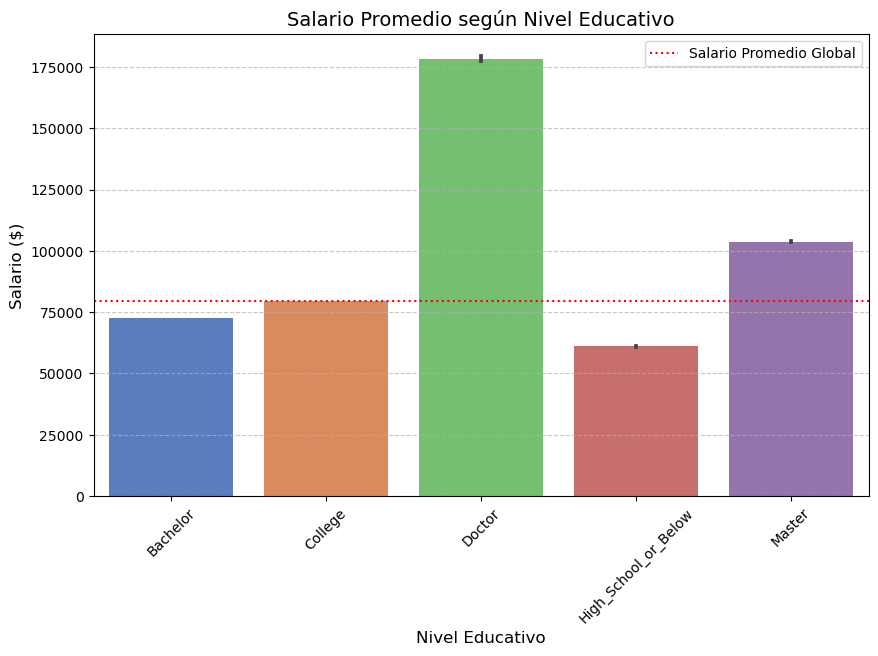

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Salary_$', data=df_aerolinea, palette='muted', estimator=np.mean)

# Agregar una línea horizontal con el salario promedio general
plt.axhline(y=df_aerolinea['Salary_$'].mean(), color='red', linestyle=':', label='Salario Promedio Global')

plt.title('Salario Promedio según Nivel Educativo', fontsize=14)
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Salario ($)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()


In [24]:
salary_by_education.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary_$,5.0,99048.532,47018.672635,61146.38,72599.08,79359.0,103734.52,178403.68


#### Medimos la correlación:

In [25]:
df_aerolinea["Education_Level"] = df_aerolinea["Education"].map({"College":1,"High_School_or_Below": 2, "Bachelor": 3, "Master":4,"Doctor": 5})

In [26]:
correlacion = df_aerolinea['Education_Level'].corr(df_aerolinea['Salary_$'],method = 'pearson')
print(f"La correlación entre ambas columnas es de: {correlacion:.2f}")#2f redondeamos a 2 decimales, podemos indicarle el nº que valoremos

La correlación entre ambas columnas es de: 0.33


### Análisis

Los niveles educativos de mayor salario son Doctor y Master
El de menor nivel salarial corresponde a High_School_or_Below.

El nivel educativo College se encuentra en el valor exacto del salario promedio de los clientes, por lo que la mayoría de clientes entendemos tienen un nivel educativo de College. Igualmente podemos deducir que la mayor dispersión d edatos en este sentido la encontramos en los clientes con nivel educativo doctor.

La correlación entre ambas columnas es del 0,33. No indica una correlación fuerte entre ambas.

### 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [27]:
df_aerolinea.columns

Index(['Loyalty_Number', 'Province', 'City', 'Postal_Code', 'Gender',
       'Education', 'Salary_$', 'Marital_Status', 'Loyalty_Card', 'CLV',
       'Enrollment_Type', 'Enrollment_Date', 'Flights_Booked',
       'Flights_with_Companions', 'Total_Flights', 'Distance',
       'Points_Accumulated', 'Points_Redeemed', 'Dollar_Cost_Points_Redeemed',
       'Date', 'Month', 'Year', 'Education_Level'],
      dtype='object')

### Cálculo de proporciones

In [28]:
df_aerolinea['Loyalty_Card'].unique()

array(['Star', 'Nova', 'Aurora'], dtype=object)

In [29]:
loyalty_counts = df_aerolinea['Loyalty_Card'].value_counts()

In [30]:
loyalty_counts

Loyalty_Card
Star      183745
Nova      136883
Aurora     83132
Name: count, dtype: int64

In [31]:
# Porcentajes de cada tipo de tarjeta de lealtad
loyalty_percentages = df_aerolinea['Loyalty_Card'].value_counts(normalize=True) * 100

# Redondear si quieres ver los porcentajes más limpios
loyalty_percentages = loyalty_percentages.round(2)

print(loyalty_percentages)

Loyalty_Card
Star      45.51
Nova      33.90
Aurora    20.59
Name: proportion, dtype: float64


### Gráfica de proporciones

#### Tenemos una columna con datos categóricos, vamos a usar countplot

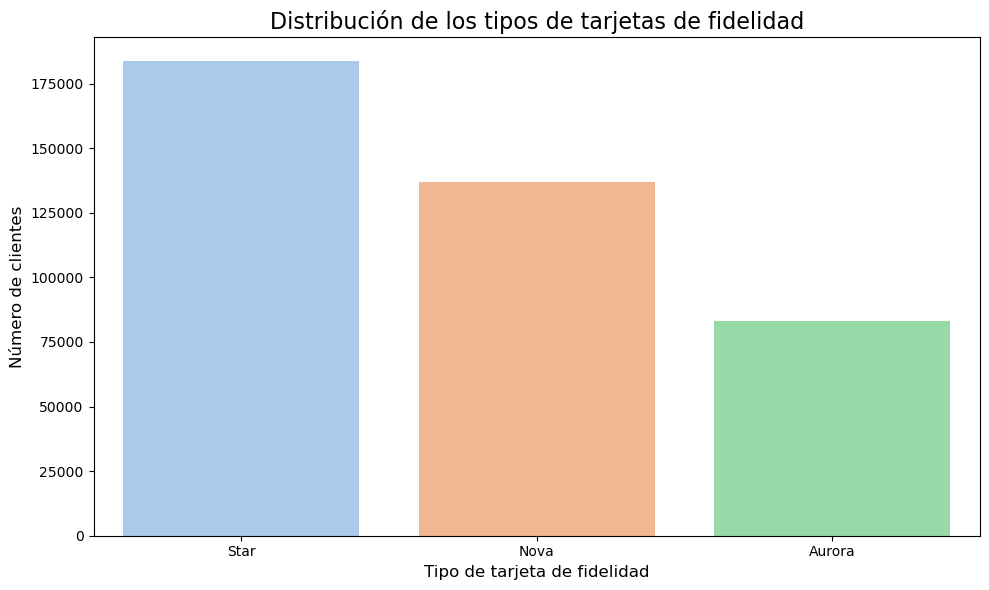

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Loyalty_Card', data=df_aerolinea, palette='pastel')

# Añadir título y etiquetas
plt.title('Distribución de los tipos de tarjetas de fidelidad', fontsize=16)
plt.xlabel('Tipo de tarjeta de fidelidad', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

### Análisis

Cómo ya hemos recogido con los datos numéricos, la mayor parte de los clientes tienen tarjet Star, seguido de tarjeta Nova y por último tarjeta Aurora. 

#### Para mejorar la visibilidad del dato, solicito información sobre como generar porcentajes en las columnas.

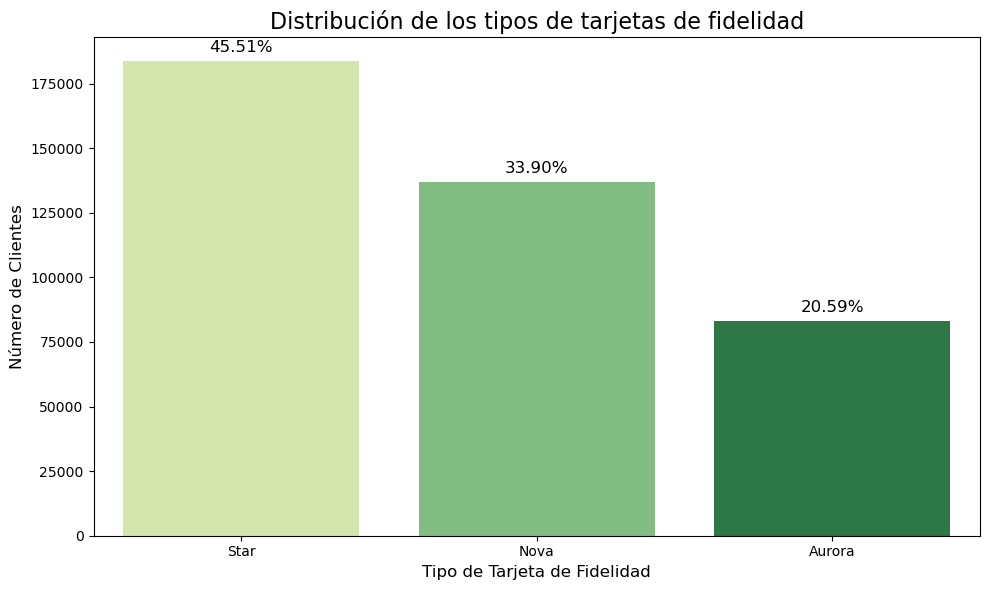

In [33]:
# Generar el countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Loyalty_Card', data=df_aerolinea, palette='YlGn')

# Calcular los porcentajes para cada barra
total = len(df_aerolinea)
for p in ax.patches:
    height = p.get_height()  # Altura de cada barra
    percentage = (height / total) * 100  # Calcular el porcentaje
    ax.annotate(f'{percentage:.2f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', 
                va='center', 
                fontsize=12, 
                color='black', 
                xytext=(0, 10), 
                textcoords='offset points')

# Añadir título y etiquetas
plt.title('Distribución de los tipos de tarjetas de fidelidad', fontsize=16)
plt.xlabel('Tipo de Tarjeta de Fidelidad', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Mostrar gráfico
plt.tight_layout()
plt.show()

Explicación:

- Calcular el total de elementos: Se obtiene el total de los datos con len(df_aerolinea).

- Iterar sobre las barras (ax.patches): Para cada barra, calculamos la altura (p.get_height()) y la convertimos en porcentaje dividiendo por el total de elementos y multiplicando por 100.

- Añadir anotación: Usamos ax.annotate para colocar el porcentaje en cada barra, centrándolo en el eje X y un poco por encima de la barra (xytext=(0, 10)).

- Estilos: Puedes ajustar el tamaño de la fuente (fontsize) y el color de la anotación.

### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [34]:
df_aerolinea.columns

Index(['Loyalty_Number', 'Province', 'City', 'Postal_Code', 'Gender',
       'Education', 'Salary_$', 'Marital_Status', 'Loyalty_Card', 'CLV',
       'Enrollment_Type', 'Enrollment_Date', 'Flights_Booked',
       'Flights_with_Companions', 'Total_Flights', 'Distance',
       'Points_Accumulated', 'Points_Redeemed', 'Dollar_Cost_Points_Redeemed',
       'Date', 'Month', 'Year', 'Education_Level'],
      dtype='object')

In [35]:
df_aerolinea['Marital_Status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [36]:
df_aerolinea['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [37]:
categoricas= df_aerolinea.select_dtypes(include = 'O')
categoricas

,Province,City,Postal_Code,Gender,Education,Marital_Status,Loyalty_Card,Enrollment_Type,Enrollment_Date
0,Ontario,Toronto,M2Z_4K1,Female,Bachelor,Married,Star,Standard,2016-02
126144,British_Columbia,Dawson_Creek,U5I_4F1,Male,College,Single,Nova,Standard,2017-05
331680,Ontario,Ottawa,K1F_2R2,Female,Bachelor,Married,Star,Standard,2012-12
192120,British_Columbia,Vancouver,V1E_4R6,Male,Bachelor,Married,Nova,Standard,2015-08
288984,Ontario,Toronto,M2Z_4K1,Male,Bachelor,Single,Star,Standard,2013-06
...,...,...,...,...,...,...,...,...,...
363647,New_Brunswick,Fredericton,E3B_2H2,Male,Bachelor,Married,Star,Standard,2013-04
133559,Manitoba,Winnipeg,R2C_0M5,Female,Bachelor,Married,Nova,Standard,2013-12
133583,British_Columbia,West_Vancouver,V6V_8Z3,Male,Bachelor,Married,Nova,Standard,2014-09
127967,British_Columbia,Whistler,V6T_1Y8,Male,College,Married,Nova,Standard,2013-05


In [38]:
categoricas.describe().T

,count,unique,top,freq
Province,403760,11,Ontario,130258
City,403760,29,Toronto,80775
Postal_Code,403760,55,V6E_3D9,21944
Gender,403760,2,Female,202757
Education,403760,5,Bachelor,252567
Marital_Status,403760,3,Married,234845
Loyalty_Card,403760,3,Star,183745
Enrollment_Type,403760,2,Standard,380419
Enrollment_Date,403760,81,2018-04,8319


In [39]:
percentage_male = df_aerolinea[df_aerolinea['Gender'] == 'Male'].shape[0] / df_aerolinea.shape[0] * 100
print(f"Porcentaje de clientes masculinos: {percentage_male:.2f}%")

Porcentaje de clientes masculinos: 49.78%


In [40]:
percentage_female = df_aerolinea[df_aerolinea['Gender'] == 'Female'].shape[0] / df_aerolinea.shape[0] * 100
print(f"Porcentaje de clientes femeninos: {percentage_female:.2f}%")

Porcentaje de clientes femeninos: 50.22%


In [41]:
# Creamos una tabla de contingencia entre género y estado civil
contingencia = pd.crosstab(df_aerolinea['Gender'], df_aerolinea['Marital_Status'])

# Mostrar la tabla
print(contingencia)

Marital_Status  Divorced  Married  Single
Gender                                   
Female             30634   117363   54760
Male               30128   117482   53393


Podemos ver que los datos son muy parejos tanto en género como en la agrupación de éste con respecto a su estado civil

### Graficamos

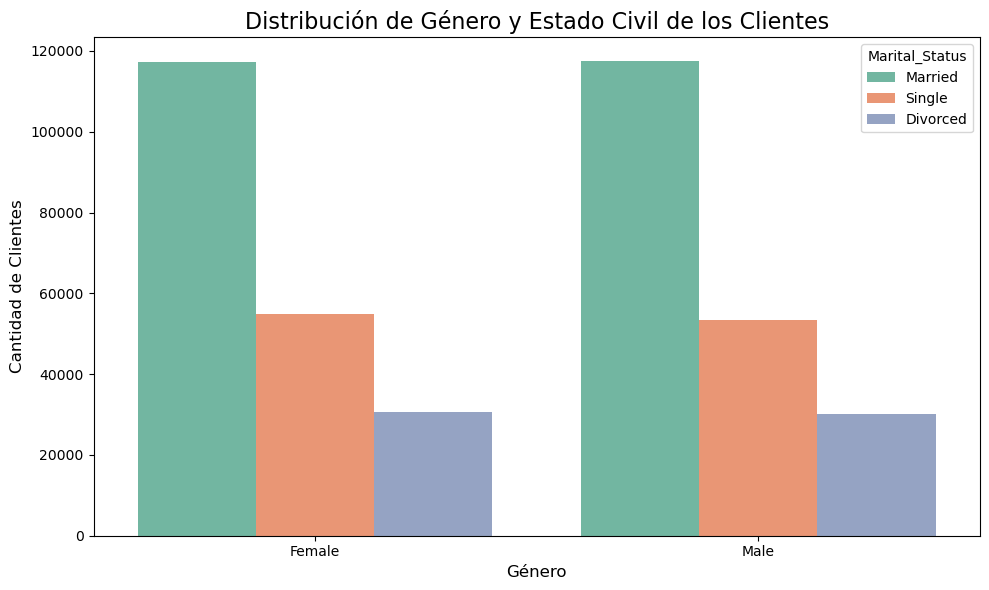

In [42]:
# Crear una figura con tamaño ajustado
plt.figure(figsize=(10, 6))

# Crear el countplot para ver la distribución de Género y Estado Civil
sns.countplot(x='Gender', hue='Marital_Status', data=df_aerolinea, palette='Set2')

# Añadir título y etiquetas
plt.title('Distribución de Género y Estado Civil de los Clientes', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

### Análisis

Ambos géneros de clientes recogen un dato muy parejo de estado civil. E igualmete podemos ver que la proporción entre hombres y mujeres es casi el mismo. 